In [12]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [3]:
FIG_DIR = "/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/stagnation/"

In [13]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm"
#robots = [4, 6]
seeds = [i for i in range(1, 30)]
print(seeds)
robots = [2,4,6,10,20,40,60,80,100,120,150]
rab_ranges = [4,8,12]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [14]:
def get_name(n_robot,seed,range):
    fname = DATA_DIR +'/'+'perf_movement_congestion_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    #print(fname)
    return fname

In [15]:
def column_position(n_robot,seed,range):
    fname = DATA_DIR +'/'+'pos_movement_congestion_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    #print(fname)
    return fname

In [16]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('state_'+str(k))
        n.append('estimate_'+str(k))
        n.append('white_nei_'+str(k))
        n.append('black_nei_'+str(k))
        n.append('white_nei_agg_'+str(k))
        n.append('black_nei_agg_'+str(k))
        n.append('decision_flag_'+str(k))

    
    n.append('exp_finished')
    return n

In [17]:
def get_names_for_position(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
        n.append('state_'+str(k))
    
    n.append('exp_finished')
    return n

Total collision per robot in the whole experiment, time_taken and estimate average. 

In [18]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        for seed in seeds: 
        

            fname = get_name(robot,seed,range_)
            try:
                perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            except:
                print("error in reading file for seed: ",seed," and robot: ",robot," and range: ",range_)
                continue
            df = pd.DataFrame(data=perf_frame)

            collision_sum = pd.DataFrame() 
            time_ = pd.DataFrame()
            # print(df)
        
            collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
            collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
            collision_sum['number_of_robots'] = robot
            collision_sum['seed'] = seed
            collision_sum['range'] = range_/10

            time_= df['exp_finished'].tail(1).reset_index()
            time_.rename(columns={'index':'time'}, inplace=True)
            time_['time'] = time_['time']/10
            time_['number_of_robots'] = robot
            time_['seed'] = seed
            time_['range'] = range_/10


            total_collision = pd.concat([total_collision,collision_sum], ignore_index=True)    
            total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)


/tmp/ipykernel_93817/362169645.py:11: DtypeWarning: Columns (8,17,26,35,44,53,62,71,80) have mixed types. Specify dtype option on import or set low_memory=False.
  perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))


     exp_finished  collision_sum  number_of_robots  seed  range
0             1.0      84.700000                 2     1    0.4
1             1.0      18.000000                 2     2    0.4
2             1.0      17.300000                 2     3    0.4
3             1.0      35.350000                 2     4    0.4
4             1.0      34.750000                 2     5    0.4
..            ...            ...               ...   ...    ...
952           1.0    1730.658667               150    25    1.2
953           1.0    1940.848000               150    26    1.2
954           1.0    1034.090000               150    27    1.2
955           1.0    1012.416000               150    28    1.2
956           1.0    1264.079333               150    29    1.2

[957 rows x 5 columns]
       time  exp_finished  number_of_robots  seed  range
0    1348.7           1.0                 2     1    0.4
1     308.7           1.0                 2     2    0.4
2     273.4           1.0            

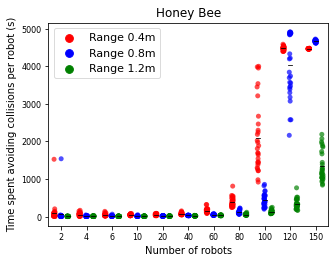

In [19]:
dx="number_of_robots"
dy="collision_sum"
dhue="range"
pal=["red","blue","green"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Honey Bee")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time spent avoiding collisions per robot (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/move_cong_collision_time_spent_pm.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

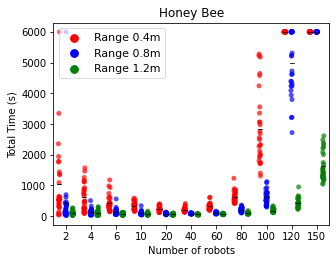

In [20]:
dx="number_of_robots"
dy="time"
dhue="range"
pal=["red","blue","green"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Honey Bee")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=12,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/move_cong_time_spent_pm.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

Visitation frequency in a grid fashion 


In [ ]:

for robot in robots:
   for seed in seeds:

        black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']
        white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']


        fname = column_position(robot,seed)
        print(fname)
        pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

        df = pd.DataFrame(pos_frame)
        df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
        state = df.filter(regex='state').melt()

        df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

        positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
        positionalDf = positionalDf.melt()
        positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
        positionalDf["state"] = state["value"]

        positionalDf_black = positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)
        positionalDf_white = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)

        x = list(positionalDf_white['position'].apply(lambda x: x[0]))
        y = list(positionalDf_white['position'].apply(lambda y: y[1]))

        f, ax = plt.subplots(figsize=(5.5,4.75))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("Heatmap for white robots:" + str(robot) + " seed: "+str(seed))
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(heatmap, origin='lower', extent=extent)
        plt.colorbar()
        plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.1)
        plt.savefig("heatmap_white_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()        

        x = list(positionalDf_black['position'].apply(lambda x: x[0]))
        y = list(positionalDf_black['position'].apply(lambda y: y[1]))

        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        
        f, ax = plt.subplots(figsize=(5.5,4.75))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("Heatmap for black robots:" + str(robot) + " seed: "+str(seed))
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(heatmap, origin='lower', extent=extent)
        plt.colorbar()
        plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        plt.tight_layout(pad=1)
        ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.1)
        plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        plt.savefig("heatmap_black_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()





In [ ]:
x = list(positionalDf_black['position'].apply(lambda x: x[0]))
y = list(positionalDf_black['position'].apply(lambda y: y[1]))

# print(positionalDf_black['position'])
# print(x)
# print(y)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
print(extent)
plt.imshow(heatmap, origin='lower', extent=extent)

#plt.clim(0,30000) 
plt.colorbar()
plt.savefig("heatmap_black.pdf", dpi=600, format="pdf", transparent=False)
# plt.show()

In [9]:
seeds = [i for i in range(1, 30)]
print(seeds)
robots = [10,40,80,120]
rab_ranges = [8]

exp_x = []
exp_y = []

for robot in robots:
   for range_ in rab_ranges:
      positionalDf_black = pd.DataFrame()
      positionalDf_white = pd.DataFrame()
         
      for seed in seeds:
            white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
            fname = column_position(robot,seed,range_)
            #print(fname)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            state = df.filter(regex='state').melt()

            df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

            positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf = positionalDf.melt()
            positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
            positionalDf["state"] = state["value"]

            #positionalDf_black = pd.concat([positionalDf_black,positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)], ignore_index=True) 
            
            position = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)
            x = position['position'].apply(lambda x: x[0])
            y = position['position'].apply(lambda y: y[1])
            exp_x.append(x)
            exp_y.append(y)
      
      x = pd.concat(exp_x, ignore_index=True)
      y = pd.concat(exp_y, ignore_index=True)
      
      f, ax = plt.subplots(figsize=(4.6,4))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("No of robots: "+str(robot))
      
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
      if (robot==120):
            plt.colorbar(fraction=0.046, pad=0.04)
      plt.clim(0,0.6)
      plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      if (robot==10):
            ax.set_ylabel("zone A samplers\n x (m)",fontsize=10)
      else:
            ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.2)
      plt.xticks(np.arange(-2,2.5,0.5))
      plt.yticks(np.arange(-2,2.5,0.5))
      plt.savefig("heatmap_white_move_congestion_pm"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()       

      # x = list(positionalDf_black['position'].apply(lambda x: x[0]))
      # y = list(positionalDf_black['position'].apply(lambda y: y[1]))

      # f, ax = plt.subplots(figsize=(5.5,4.75))
      # plt.rc('xtick', labelsize=10) 
      # plt.rc('ytick', labelsize=10) 
      # plt.title("Heatmap for black robots:" + str(robot) + " range: "+str(range_/10))
      # heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
      # extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      # plt.imshow(heatmap, origin='lower', extent=extent)
      # plt.colorbar()
      # plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      # plt.tight_layout(pad=1)
      # ax.set_ylabel("x (m)",fontsize=10)
      # ax.set_xlabel("y (m)",fontsize=10)
      # plt.tight_layout(pad=0.1)
      # plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      # plt.savefig("heatmap_black_move_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      # plt.clf()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_5.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

In [8]:
x = pd.concat(exp_x, ignore_index=True)

In [9]:
y = pd.concat(exp_y, ignore_index=True)

In [13]:
robots = [120]
rab_ranges = [4]
seeds = [i for i in range(0, 30)]

white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            df_state = df.filter(regex='state')
            delta_df_x = df_x.diff()
            delta_df_y = df_y.diff()
            delta_df_x = delta_df_x.replace(np.nan,0)
            delta_df_x = delta_df_x.add_prefix('del_')
            delta_df_y = delta_df_y.replace(np.nan,0)
            delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
            agg_df["delta_x"] = pd.melt(delta_df_x,var_name='robot', value_name='delta_x')["delta_x"]
            agg_df["delta_y"] = pd.melt(delta_df_y,var_name='robot', value_name='delta_y')["delta_y"]
            agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

            df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-2,2.2,0.2), labels=np.arange(-2,2,0.2))
            df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-2,2.2,0.2), labels=np.arange(-2,2,0.2))

            positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            


df_grouped = positionalDf_white.groupby(['bin_x', 'bin_y']).agg(x=('delta_x', np.sum),y=('delta_y', np.sum))
df = df_grouped.reset_index()
df["magnitude"] = np.sqrt(df["x"]**2 + df["y"]**2)
df["magnitude"] = df["magnitude"].replace(0,1)
df["x_norm"] = df["x"]/df["magnitude"]
df["y_norm"] = df["y"]/df["magnitude"]


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_5.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_120_4_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/da

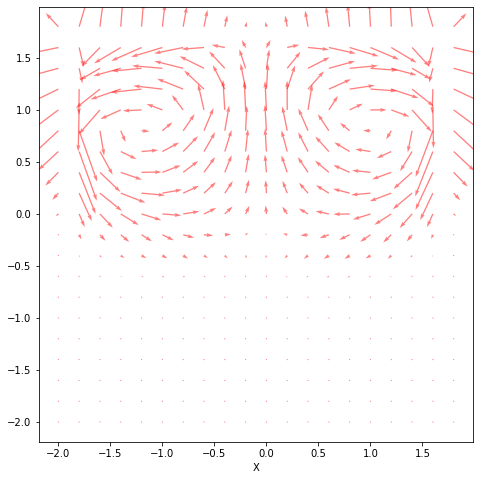

In [14]:
fig, ax = plt.subplots(figsize =(14, 8))

ax.quiver(df['bin_x'],df['bin_y'],df['x'], df['y'], units='xy', color='red', alpha=0.5)
ax.set_xlabel('X')
#ax.axis([-0.3, 2.3, -0.3, 2.3])
ax.set_aspect('equal')
#plt.savefig('quiver_plot.pdf',dpi=900)
# show plot
plt.show()

In [11]:
# robots = [2]
rab_ranges = [4]
#seeds = [1]
threshold = 10
percent_end = 5
seeds = [i for i in range(0, 30)]
robots = [80,100,120,150]
exp_x = []
exp_y = []
white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            try:
                pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            except:
                print("error in reading file for seed: ",seed," and robot: ",robot," and range: ",range_)
                continue
            
            df = pd.DataFrame(pos_frame)
            df = df.tail(int(len(df) * percent_end / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
            # agg_df["delta_x"] = pd.melt(delta_df_x,var_name='robot', value_name='delta_x')["delta_x"]
            # agg_df["delta_y"] = pd.melt(delta_df_y,var_name='robot', value_name='delta_y')["delta_y"]
            agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

            df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            df_white['combine_bin']= df_white['robot'].astype(str)+df_white['bin_x'].astype(str) + df_white['bin_y'].astype(str)
            df_white['Occurrences'] = df_white.groupby((df_white['combine_bin'] != df_white['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = df_white['combine_bin'] != df_white['combine_bin'].shift(-1)
            df_result = df_white[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.8,3.5))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("Honey Bee (N="+str(robot)+",T=end)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(heatmap/5000.0, origin='lower', extent=extent,cmap="gist_ncar",norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))

    if (robot==150):
        f.colorbar(im, fraction=0.046, pad=0.04)
    #plt.clim(0,5000)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    if (robot==80):
            ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
    else:
            ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.tight_layout(pad=0.3)
    plt.xticks(np.arange(-2,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"move/heatmap_white_end_move_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_end)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf() 

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>